In [1]:
import numpy as np

In [ ]:
class UserClass:

  def __init__(self,number_of_user, alfas, num_products_bought, p_matrix ) :

    self.conversion_rate_vector = np.random.uniform(0.0,1.0,(5,4))      #randomly generates the conversion rates for every price
    self.number_of_user = number_of_user
    self.alfas = alfas
    self.num_products_bought = num_products_bought
    self.p_matrix = p_matrix
  
class Product:

    def __init__(self,id, price_vector) :

      self.id = id
      self.price_vector = price_vector
      




In [ ]:
p_matrix = [[0,0,0.2,0,0],
                [0.9,0,0,0.3,0],
                [0.9,0.2,0,0.2,0],
                [0.9,0,0,0,0],
                [0,0,0,0,0]] 
num_products_bought = [2, 1, 3, 2, 5]
userClass1 = UserClass(100, np.random.dirichlet([1, 1, 1, 1, 1]), num_products_bought, p_matrix )
userClass2 = UserClass(200, np.random.dirichlet([1, 1, 1, 1, 1]), num_products_bought, p_matrix )
userClass3 = UserClass(50, np.random.dirichlet([1, 1, 1, 1, 1]), num_products_bought, p_matrix )
userClasses = [userClass1, userClass2, userClass3]

price_vector = [10, 20, 30, 40]
p1 = Product("p1", price_vector )
p2 = Product("p2", price_vector )
p3 = Product("p3", price_vector )
p4 = Product("p4", price_vector )
p5 = Product("p5", price_vector )

total_daily_users = userClass1.number_of_user + userClass2.number_of_user + userClass3.number_of_user
n_episodes = 100


optimal_prices = [p1.price_vector[0], p2.price_vector[0], p3.price_vector[0], p4.price_vector[0], p5.price_vector[0]]
optimal_prices_index = np.zeros(5)
best_total_revenue = 0

for uc in userClasses:
  for j in range(0, uc.number_of_user):
    initial_product = np.random.choice(5, 1, [a for a in uc.alfas])[0]

    history = simulate_episode(uc.p_matrix, 10, initial_product, 0.5)
    
    tot_products_bought = np.zeros(5)

    for row in history:
      tot_products_bought +=  row

    tot_products_bought *= uc.num_products_bought
    revenue_per_user = np.sum(tot_products_bought*optimal_prices)
    best_total_revenue += revenue_per_user

for i in range(0, 5):
  total_revenue = 0
  temp_price_index = optimal_prices_index
  temp_price_index[i] += 1
  temp_optimal_prices = [p1.price_vector[temp_price_index[0]], p2.price_vector[temp_price_index[1]], p3.price_vector[temp_price_index[2]],
                         p4.price_vector[temp_price_index[3]], p5.price_vector[temp_price_index[4]]]

    
    

  




















In [ ]:
class GreedyAlgorithm:

  def buy_or_not( self, active_nodes, userClass, prices):

    buy_or_not_nodes = np.zeros(5)
    i = 0
    for node in active_nodes : 
      if ( node == 1 & i == 0):
        product = "p1"
        price = userClass.conversion_rate["p1"]
      if ( node == 1 & i == 1):
        product = "p2"
        price = userClass.conversion_rate["p2"]
      if ( node == 1 & i == 2):
        product = "p3"
        price = userClass.conversion_rate["p3"]
      if ( node == 1 & i == 3):
        product = "p4"
        price = userClass.conversion_rate["p4"]
      if ( node == 1 & i == 4):
        product = "p5"
        price = userClass.conversion_rate["p5"]

      conv_rate = userClass.conversion_rate[product][price]
      if (conv_rate > np.random.uniform() & node ==1):
        buy_or_not_nodes[i] = 1
      else :
        buy_or_not_nodes[i] = 0

      i=i +1
    return buy_or_not_nodes

    def iterator (self):

      #start with lowest price
      for 





In [ ]:
from IPython.core.display import ProgressBar
import numpy as np
from copy import copy

def simulate_episode(init_prob_matrix, n_steps_max, initial_product, lambd):
    prob_matrix = init_prob_matrix.copy()
    n_nodes = prob_matrix.shape[0]
    initial_active_nodes = np.zeros(5, dtype=int)
    initial_active_nodes[initial_product] = 1
    history = np.array([initial_active_nodes])
    active_nodes = initial_active_nodes
    newly_active_nodes = active_nodes
    t=0


    while(t < n_steps_max and np.sum(newly_active_nodes) > 0):
        #print("giro ", t)
        #print(prob_matrix)

        buy_or_not_nodes = buy_or_not( active_nodes, userClass, product_indx, price) 
        p = (prob_matrix.T * buy_or_not_nodes).T

        #print("p matrix : \n", p)
        #p is used to select from the prob matrix only the rows with active nodes  (.T compute the transpose)... returns the set of probabilities corresponding to the edges leaving from an active_node
        lambda_vector = np.zeros(n_nodes)
        lambda_matrix = np.zeros(shape = (n_nodes, n_nodes))
        for i in range(0, n_nodes):
            idx1 = -1
            idx2 = -1
            lambda_vector = np.zeros(5)
            while(idx1 == idx2 or idx1 == i or idx2 == i):
                [idx1, idx2] = np.random.choice(5, 2)
            lambda_vector[idx1] = 1
            lambda_vector[idx2] = lambd
            lambda_matrix[i] = lambda_vector
        #lambda matrix has primary products on the rows, secondary on the columns, 1 if the secondary is in the first slot, lambda otherwise 
        #print("lambda matrix : \n", lambda_matrix)
        p = (p * lambda_matrix)
        #print("p after lambda vec : \n", p)
        activated_edges = p > np.random.rand(p.shape[0], p.shape[1])
        #print("activated edges : \n", activated_edges)
        prob_matrix = prob_matrix * ((p!=0) == activated_edges)
        newly_active_nodes = (np.sum(activated_edges, axis=0) > 0) * (1 - active_nodes)
        active_nodes = np.array(active_nodes + newly_active_nodes)
        #print("active nodes at t+1: \n", active_nodes)
        history = np.concatenate((history, [newly_active_nodes]), axis = 0)
        #print("history : \n", history)
        t += 1

        #all edges leaving from the node that didn't buy go to 0 
    return history
    

n_nodes = 5
n_episodes = 1000


#prob_matrix = np.random.uniform(0.0, 1.0, (n_nodes, n_nodes))

prob_matrix = [[0,0,0.2,0,0],
                [0.9,0,0,0.3,0],
                [0.9,0.2,0,0.2,0],
                [0.9,0,0,0,0],
                [0,0,0,0,0]] 
prob_matrix = np.reshape(prob_matrix, (5,5))
#print("prob_matrix:", prob_matrix)
for i in range(0, n_nodes):
    prob_matrix[i][i] = 0
alphas = np.random.dirichlet([1, 1, 1, 1, 1])
node_index = 1
lambd = 0.5
dataset = []

for e in range(0, n_episodes):
    #print("EPISODE:  ", e)
    initial_product = np.random.choice(5, 1, [a for a in alphas])[0]
    #print( "initial product (aka starting node):", initial_product)
    dataset.append(simulate_episode(init_prob_matrix = prob_matrix, n_steps_max=3, initial_product = initial_product, lambd=lambd))
    #print( "dataset: ", dataset)
#print( "dataset: ", dataset)



#vector that will contain in every cell the prob of visiting such a product
nodes_visit_prob = np.zeros(5)
for episode in dataset:

  for row in episode:
      active_idx = np.where( row == 1)
      #print("active_idx:", active_idx)
      for i in active_idx:
        nodes_visit_prob[i] = nodes_visit_prob[i]+1
print( "nodes_visits ", nodes_visit_prob)       
for n in range(0, n_nodes):
  nodes_visit_prob[n] = nodes_visit_prob[n]/ n_episodes
print( "nodes_visit_prob: ", nodes_visit_prob)


#print("True P Matrix: \n", prob_matrix)
#print("Estimated P Matrix: \n", estimated_matrix)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Learner:

  def __init__(self, n_arms) :
    self.n_arms = n_arms
    self.t = 0
    self.rewards_per_arm = x = [[] for i in range(n_arms)]
    self.collected_rewards = np.array([])

  def update_observations(self,pulled_arm, reward) :
    self.rewards_per_arm[pulled_arm].append(reward)
    self.collected_rewards = np.append(self.collected_rewards, reward)

In [ ]:
class Environment():
  def __init__(self,n_arms, probabilities) :
    self.n_arms = n_arms
    self.probabilities = probabilities 

  def round(self, pulled_arm) :
   reward = np.random.binomial(1,self.probabilities[pulled_arm])      
   return reward

In [ ]:
class TS_Learner(Learner) :
  def __init__(self, n_arms):
    super().__init__(n_arms)
    self.beta_parameters = np.ones((n_arms, 2))

  def pull_arm(self) :
    idx = np.argmax(np.random.beta(self.beta_parameters[:,0 ], self.beta_parameters[:,1]))   #the expected rewards (our guess) are beta distributions( in the TS learner) (process: we draw an actual reward(aka sample) and based on what we have drawn we position and shape the binomila distribution of the expected reward)
    return idx

  def update(self, pulled_arm, reward):
    self.t+1
    self.update_observations(pulled_arm, reward)
    self.beta_parameters[pulled_arm, 0] = self.beta_parameters[pulled_arm, 0] + reward
    self.beta_parameters[pulled_arm,1] = self.beta_parameters[pulled_arm, 1] + 1.0 - reward

In [ ]:
n_arms = 4      #these are the prices possible for every product, and are the variables we wish to opimise
p = np.array([0.15, 0.1, 0.1, 0.35])      #Bernulli distributions for the reward functions of the arms ( take value 1 with p = 15% etc...) infact we have that the actual reward is a bernully distribution (buy or not)
opt = p[3]

T = 300

n_experiments = 1000
ts_rewards_per_experiment = []        #these are the revenues


In [ ]:
for e in range(0, n_experiments):
  env = Environment(n_arms = n_arms, probabilities = p)
  ts_learner = TS_Learner(n_arms= n_arms)
  gr_learner = Greedy_Learner(n_arms = n_arms)
  for t in range(0,T):
    #Thompson Sampeling Learner
    pulled_arm = ts_learner.pull_arm()
    reward = env.round(pulled_arm)
    ts_learner.update(pulled_arm, reward)


  ts_rewards_per_experiment.append( ts_learner.collected_rewards)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


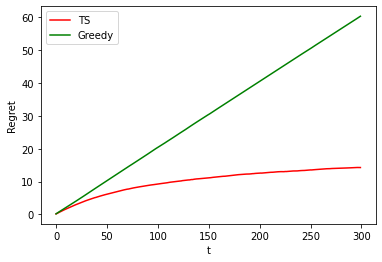

In [ ]:
plt.figure(0)
plt.ylabel("Regret")
plt.xlabel("t")
plt.plot(np.cumsum(np.mean(opt - ts_rewards_per_experiment, axis = 0)), 'r')
plt.plot(np.cumsum(np.mean(opt - gr_rewards_per_experiment, axis = 0)), 'g')
plt.legend(["TS", "Greedy"])
plt.show()

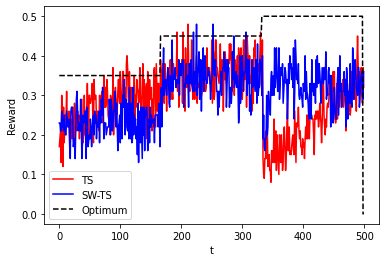

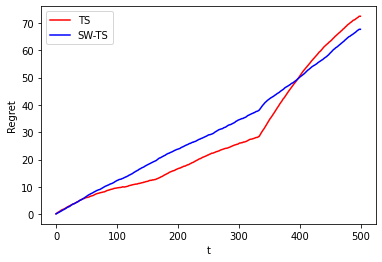

In [ ]:
plt.figure(0)
plt.plot(np.mean(ts_rewards_per_experiment, axis=0), 'r')
plt.plot(np.mean(swts_rewards_per_experiment, axis=0), 'b')
plt.plot(optimum_per_round, 'k--')
plt.legend(['TS', 'SW-TS', 'Optimum'])
plt.ylabel('Reward')
plt.xlabel('t')
plt.show()


plt.figure(1)
plt.plot(np.cumsum(ts_instantaneus_regret), 'r')
plt.plot(np.cumsum(swts_instantaneus_regret), 'b')
plt.legend(['TS', 'SW-TS', 'Optimum'])
plt.ylabel('Regret')
plt.xlabel('t')
plt.show()